## Datasets Directory:

- [`act_2019.csv`](./data/act_2019.csv): 2019 ACT Scores by State
- [`act_2019_ca.csv`](./data/act_2019_ca.csv): 2019 ACT Scores in California by School
- [`sat_2019.csv`](./data/sat_2019.csv): 2019 SAT Scores by State
- [`sat_2019_by_intended_college_major.csv`](./data/sat_2019_by_intended_college_major.csv): 2019 SAT Scores by Intended College Major
- [`sat_2019_ca.csv`](./data/sat_2019_ca.csv): 2019 SAT Scores in California by School
- [`sat_act_by_college.csv`](./data/sat_act_by_college.csv): Ranges of Accepted ACT & SAT Student Scores by Colleges

In [1]:
import plotly.express as px
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
act_2017 = pd.read_csv('act_2017.csv')
act_2018 = pd.read_csv('act_2018.csv')
act_2019 = pd.read_csv('act_2019.csv')
act_2019_ca = pd.read_csv('act_2019_ca.csv')
sat_2017 = pd.read_csv('sat_2017.csv')
sat_2018 = pd.read_csv('sat_2018.csv')
sat_2019 = pd.read_csv('sat_2019.csv')
sat_2019_ca = pd.read_csv('sat_2019_ca.csv')
sat_2019_by_intended_college_major = pd.read_csv('sat_2019_by_intended_college_major.csv')
sat_act_by_college = pd.read_csv('sat_act_by_college.csv')

In [3]:
act_2019.head() #need to clean out 100% to int/float

,State,Participation,Composite
0,Alabama,100%,18.9
1,Alaska,38%,20.1
2,Arizona,73%,19.0
3,Arkansas,100%,19.3
4,California,23%,22.6


In [4]:
act_2019.dtypes

State             object
Participation     object
Composite        float64
dtype: object

In [5]:
act_2019['State'].unique() #need to drop 'National' and 'District of Columbia' -> 50 States

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'National'], dtype=object)

In [6]:
#Change percentage (object) to int/float
def percent_to_int(x):
    return int(x.strip('%'))

act_2019['Participation'] = act_2019['Participation'].apply(percent_to_int)


In [7]:
act_2019.head()

,State,Participation,Composite
0,Alabama,100,18.9
1,Alaska,38,20.1
2,Arizona,73,19.0
3,Arkansas,100,19.3
4,California,23,22.6


In [8]:
clean_act_2019 = act_2019.drop(51, axis = 0)

In [9]:
clean_act_2019

,State,Participation,Composite
0,Alabama,100,18.9
1,Alaska,38,20.1
2,Arizona,73,19.0
3,Arkansas,100,19.3
4,California,23,22.6
5,Colorado,27,23.8
6,Connecticut,22,25.5
7,Delaware,13,24.1
8,District of Columbia,32,23.5
9,Florida,54,20.1


In [10]:
sat_2019.head()

,State,Participation Rate,EBRW,Math,Total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065


In [11]:
sat_2019['State'].unique() #act do not have Wisconsin, Puerto Rico, Virgin Islands

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virgin Islands',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [12]:
# To make sure row is numeric
replaced = sat_2019['Participation Rate'].replace('—', '0')
sat_2019['Participation Rate'] = replaced.apply(percent_to_int) # To make sure row is numeric
sat_2019

,State,Participation Rate,EBRW,Math,Total
0,Alabama,7,583,560,1143
1,Alaska,41,556,541,1097
2,Arizona,31,569,565,1134
3,Arkansas,6,582,559,1141
4,California,63,534,531,1065
5,Colorado,100,518,506,1024
6,Connecticut,100,529,516,1046
7,Delaware,100,499,486,985
8,District of Columbia,94,495,480,975
9,Florida,100,516,483,999


In [13]:
sat_2019_ca = pd.read_csv("sat_2019_ca.csv")

In [14]:
sat_2019_ca

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTSTTakr12,...,NumERWBenchmark11,PctERWBenchmark11,NumMathBenchmark11,PctMathBenchmark11,TotNumBothBenchmark12,PctBothBenchmark12,TotNumBothBenchmark11,PctBothBenchmark11,Year,Unnamed: 25
0,6.615981e+12,6.0,661598.0,630046.0,S,Colusa Alternative Home,Colusa Unified,Colusa,18.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1,6.616061e+12,6.0,661606.0,634758.0,S,Maxwell Sr High,Maxwell Unified,Colusa,29.0,10.0,...,*,*,*,*,*,*,*,*,2018-19,NaN
2,1.964733e+13,19.0,1964733.0,1930924.0,S,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,...,42,24.14,12,6.90,14,13.73,11,6.32,2018-19,NaN
3,1.964733e+13,19.0,1964733.0,1931476.0,S,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227.0,113.0,...,97,35.27,37,13.45,18,15.93,35,12.73,2018-19,NaN
4,1.964733e+13,19.0,1964733.0,1931856.0,S,Whitman Continuation,Los Angeles Unified,Los Angeles,18.0,14.0,...,*,*,*,*,*,*,*,*,2018-19,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,5.772678e+13,57.0,5772678.0,0.0,D,NaN,Davis Joint Unified,Yolo,717.0,307.0,...,454,95.78,428,90.30,268,87.30,421,88.82,2018-19,NaN
2576,7.000000e+12,7.0,700000.0,0.0,C,NaN,NaN,Contra Costa,14593.0,5412.0,...,4583,88.87,3933,76.27,2721,50.28,3853,74.71,2018-19,NaN
2577,1.700000e+13,17.0,1700000.0,0.0,C,NaN,NaN,Lake,667.0,167.0,...,94,74.60,50,39.68,65,38.92,47,37.30,2018-19,NaN
2578,3.800000e+13,38.0,3800000.0,0.0,C,NaN,NaN,San Francisco,4447.0,2256.0,...,1702,83.35,1566,76.69,1248,55.32,1482,72.58,2018-19,NaN


In [15]:
sat_act_college = pd.read_csv('sat_act_by_college.csv')

In [16]:
sat_act_college

,School,Test Optional?,Applies to Class Year(s),Policy Details,Number of Applicants,Accept Rate,SAT Total 25th-75th Percentile,ACT Total 25th-75th Percentile
0,Stanford University,Yes,2021,Stanford has adopted a one-year test optional ...,47452,4.3%,1440-1570,32-35
1,Harvard College,Yes,2021,Harvard has adopted a one-year test optional p...,42749,4.7%,1460-1580,33-35
2,Princeton University,Yes,2021,Princeton has adopted a one-year test optional...,35370,5.5%,1440-1570,32-35
3,Columbia University,Yes,2021,Columbia has adopted a one-year test optional ...,40203,5.5%,1450-1560,33-35
4,Yale University,Yes,2021,Yale has adopted a one-year test optional poli...,36844,6.1%,1460-1570,33-35
...,...,...,...,...,...,...,...,...
411,University of Texas Rio Grande Valley,No,NaN,University of Texas Rio Grande Valley requires...,10680,79.8%,950-1130,17-22
412,University of South Dakota,No,NaN,Unviersity of South Dakota requires either the...,4434,86.4%,990-1180,19-25
413,University of Mississippi,No,NaN,Ole Miss requires either the SAT or ACT. It do...,15371,88.1%,1050-1270,21-29
414,University of Wyoming,No,NaN,University of Wyoming requires either the SAT ...,5348,96.0%,1060-1280,22-28


In [17]:
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


In [18]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


In [19]:
# Source: https://apps.bea.gov/iTable/iTable.cfm?acrdn=1&isuri=1&reqid=70&step=1#acrdn=1&isuri=1&reqid=70&step=1
# Reading in the trended GDP per capita by state CSV file
trended_gdp_per_capita_by_state = pd.read_csv('download.csv', header=4)
trended_gdp_per_capita_by_state.head()

,GeoFips,GeoName,2017,2018,2019
0,00000,United States,51573.0,53817.0,55724.0
1,01000,Alabama,40252.0,41607.0,43157.0
2,02000,Alaska *,57278.0,59783.0,61639.0
3,04000,Arizona,43301.0,45299.0,47242.0
4,05000,Arkansas,42056.0,43661.0,45037.0


In [20]:
# Irrelevant rows in the tail end of the dataframe
trended_gdp_per_capita_by_state.tail(10)

,GeoFips,GeoName,2017,2018,2019
55,94000,Plains,49359.0,51419.0,52969.0
56,95000,Southeast,45748.0,47633.0,49414.0
57,96000,Southwest,47278.0,49815.0,51449.0
58,97000,Rocky Mountain,49534.0,52220.0,54605.0
59,98000,Far West,56991.0,59627.0,62262.0
60,Legend / Footnotes:,NaN,NaN,NaN,NaN
61,2/ Per capita personal income is total persona...,NaN,NaN,NaN,NaN
62,* Estimates prior to 1950 are not available fo...,NaN,NaN,NaN,NaN
63,Note. All dollar estimates are in millions of ...,NaN,NaN,NaN,NaN
64,"Last updated: March 23, 2022—preliminary stati...",NaN,NaN,NaN,NaN


In [21]:
# Some state names have a * after the state name
trended_gdp_per_capita_by_state.head()

,GeoFips,GeoName,2017,2018,2019
0,00000,United States,51573.0,53817.0,55724.0
1,01000,Alabama,40252.0,41607.0,43157.0
2,02000,Alaska *,57278.0,59783.0,61639.0
3,04000,Arizona,43301.0,45299.0,47242.0
4,05000,Arkansas,42056.0,43661.0,45037.0


In [22]:
# Finding missing data in the dataframe
trended_gdp_per_capita_by_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   GeoFips  65 non-null     object 
 1   GeoName  60 non-null     object 
 2   2017     60 non-null     float64
 3   2018     60 non-null     float64
 4   2019     60 non-null     float64
dtypes: float64(3), object(2)
memory usage: 2.7+ KB


In [23]:
# Dropping rows that have missing value
trended_gdp_per_capita_by_state.dropna(inplace=True)
trended_gdp_per_capita_by_state.tail(10)

,GeoFips,GeoName,2017,2018,2019
50,55000,Wisconsin,48741.0,50818.0,52417.0
51,56000,Wyoming,57126.0,60353.0,61571.0
52,91000,New England,63109.0,65737.0,67996.0
53,92000,Mideast,59717.0,61927.0,63788.0
54,93000,Great Lakes,48407.0,50503.0,52069.0
55,94000,Plains,49359.0,51419.0,52969.0
56,95000,Southeast,45748.0,47633.0,49414.0
57,96000,Southwest,47278.0,49815.0,51449.0
58,97000,Rocky Mountain,49534.0,52220.0,54605.0
59,98000,Far West,56991.0,59627.0,62262.0


In [24]:
# Dropping the column 'GeoFips' as it is irrelevant
trended_gdp_per_capita_by_state.drop('GeoFips', axis=1, inplace=True)
trended_gdp_per_capita_by_state.head()

,GeoName,2017,2018,2019
0,United States,51573.0,53817.0,55724.0
1,Alabama,40252.0,41607.0,43157.0
2,Alaska *,57278.0,59783.0,61639.0
3,Arizona,43301.0,45299.0,47242.0
4,Arkansas,42056.0,43661.0,45037.0


In [25]:
# Removing * from Alaska
trended_gdp_per_capita_by_state.at[2, 'GeoName'] = 'Alaska'
trended_gdp_per_capita_by_state.head()

,GeoName,2017,2018,2019
0,United States,51573.0,53817.0,55724.0
1,Alabama,40252.0,41607.0,43157.0
2,Alaska,57278.0,59783.0,61639.0
3,Arizona,43301.0,45299.0,47242.0
4,Arkansas,42056.0,43661.0,45037.0


In [26]:
# Removing * from Hawaii
trended_gdp_per_capita_by_state.head(13)
trended_gdp_per_capita_by_state.at[12, 'GeoName'] = 'Hawaii'
trended_gdp_per_capita_by_state.head(13)

,GeoName,2017,2018,2019
0,United States,51573.0,53817.0,55724.0
1,Alabama,40252.0,41607.0,43157.0
2,Alaska,57278.0,59783.0,61639.0
3,Arizona,43301.0,45299.0,47242.0
4,Arkansas,42056.0,43661.0,45037.0
5,California,58813.0,61509.0,64333.0
6,Colorado,55294.0,58471.0,61087.0
7,Connecticut,70163.0,73176.0,74930.0
8,Delaware,50516.0,52839.0,53539.0
9,District of Columbia,79967.0,82512.0,83270.0


In [27]:
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


In [28]:
# Renaming the columns in GDP per capita by state
trended_gdp_per_capita_by_state.rename(columns={'GeoName':'State',
                                               '2017': 'GDP Per Capita (2017)',
                                               '2018': 'GDP Per Capita (2018)',
                                               '2019': 'GDP Per Capita (2019)'}, 
                                                inplace=True)
trended_gdp_per_capita_by_state

,State,GDP Per Capita (2017),GDP Per Capita (2018),GDP Per Capita (2019)
0,United States,51573.0,53817.0,55724.0
1,Alabama,40252.0,41607.0,43157.0
2,Alaska,57278.0,59783.0,61639.0
3,Arizona,43301.0,45299.0,47242.0
4,Arkansas,42056.0,43661.0,45037.0
5,California,58813.0,61509.0,64333.0
6,Colorado,55294.0,58471.0,61087.0
7,Connecticut,70163.0,73176.0,74930.0
8,Delaware,50516.0,52839.0,53539.0
9,District of Columbia,79967.0,82512.0,83270.0


In [29]:
# Renaming 'United States' to 'National' so that we can merge the dataframes
trended_gdp_per_capita_by_state.at[0, 'State'] = 'National'

In [30]:
# Sorting the States by alphabetical order
trended_gdp_per_capita_by_state.sort_values('State', axis=0)

,State,GDP Per Capita (2017),GDP Per Capita (2018),GDP Per Capita (2019)
1,Alabama,40252.0,41607.0,43157.0
2,Alaska,57278.0,59783.0,61639.0
3,Arizona,43301.0,45299.0,47242.0
4,Arkansas,42056.0,43661.0,45037.0
5,California,58813.0,61509.0,64333.0
6,Colorado,55294.0,58471.0,61087.0
7,Connecticut,70163.0,73176.0,74930.0
8,Delaware,50516.0,52839.0,53539.0
9,District of Columbia,79967.0,82512.0,83270.0
59,Far West,56991.0,59627.0,62262.0


In [31]:
# Merging act_2017 with trended GDP per capita by state
act_2017 = act_2017.merge(trended_gdp_per_capita_by_state, how='left', on='State')
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite,GDP Per Capita (2017),GDP Per Capita (2018),GDP Per Capita (2019)
0,National,60%,20.3,20.7,21.4,21.0,21.0,51573.0,53817.0,55724.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2,40252.0,41607.0,43157.0
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8,57278.0,59783.0,61639.0
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7,43301.0,45299.0,47242.0
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4,42056.0,43661.0,45037.0


In [32]:
# Notice in row 51, Composite is 20.2x, also in Notice in row 21, Science score is 2.3 but this source: 
# https://www.act.org/content/dam/act/unsecured/documents/cccr2017/ACT_2017-Average_Scores_by_State.pdf states 23.2
act_2017

,State,Participation,English,Math,Reading,Science,Composite,GDP Per Capita (2017),GDP Per Capita (2018),GDP Per Capita (2019)
0,National,60%,20.3,20.7,21.4,21.0,21.0,51573.0,53817.0,55724.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2,40252.0,41607.0,43157.0
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8,57278.0,59783.0,61639.0
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7,43301.0,45299.0,47242.0
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4,42056.0,43661.0,45037.0
5,California,31%,22.5,22.7,23.1,22.2,22.8,58813.0,61509.0,64333.0
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8,55294.0,58471.0,61087.0
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2,70163.0,73176.0,74930.0
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1,50516.0,52839.0,53539.0
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2,79967.0,82512.0,83270.0


In [33]:
# Change value in row 51, Composite (2017) (ACT) to 20.2x
act_2017.at[51, 'Composite'] = 20.2
act_2017.at[21, 'Science'] = 23.2
act_2017

,State,Participation,English,Math,Reading,Science,Composite,GDP Per Capita (2017),GDP Per Capita (2018),GDP Per Capita (2019)
0,National,60%,20.3,20.7,21.4,21.0,21.0,51573.0,53817.0,55724.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2,40252.0,41607.0,43157.0
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8,57278.0,59783.0,61639.0
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7,43301.0,45299.0,47242.0
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4,42056.0,43661.0,45037.0
5,California,31%,22.5,22.7,23.1,22.2,22.8,58813.0,61509.0,64333.0
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8,55294.0,58471.0,61087.0
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2,70163.0,73176.0,74930.0
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1,50516.0,52839.0,53539.0
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2,79967.0,82512.0,83270.0


In [34]:
# Due to the presence of a string in the column 'Composite' , the column is an object
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   State                  52 non-null     object 
 1   Participation          52 non-null     object 
 2   English                52 non-null     float64
 3   Math                   52 non-null     float64
 4   Reading                52 non-null     float64
 5   Science                52 non-null     float64
 6   Composite              52 non-null     object 
 7   GDP Per Capita (2017)  52 non-null     float64
 8   GDP Per Capita (2018)  52 non-null     float64
 9   GDP Per Capita (2019)  52 non-null     float64
dtypes: float64(7), object(3)
memory usage: 6.5+ KB


In [35]:
# Changing the column 'Composite' from object to float
act_2017['Composite'] = act_2017['Composite'].astype(float)
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   State                  52 non-null     object 
 1   Participation          52 non-null     object 
 2   English                52 non-null     float64
 3   Math                   52 non-null     float64
 4   Reading                52 non-null     float64
 5   Science                52 non-null     float64
 6   Composite              52 non-null     float64
 7   GDP Per Capita (2017)  52 non-null     float64
 8   GDP Per Capita (2018)  52 non-null     float64
 9   GDP Per Capita (2019)  52 non-null     float64
dtypes: float64(8), object(2)
memory usage: 6.5+ KB


In [36]:
# Dropping GDP per Capita information that is not relevant for the particular year
act_2017.drop(labels=['GDP Per Capita (2018)', 'GDP Per Capita (2019)'], axis=1, inplace=True)
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite,GDP Per Capita (2017)
0,National,60%,20.3,20.7,21.4,21.0,21.0,51573.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2,40252.0
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8,57278.0
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7,43301.0
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4,42056.0


In [37]:
# Notice in row 20, Maryland Math scores is 52 and do not tally with the total SAT scores
sat_2017

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [38]:
# Changing row 20, Maryland Math scores to be Total (2017) (SAT) - Evidence-Based Reading and Writing
sat_2017.at[20, 'Math'] = 1060 - 536
sat_2017

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [39]:
# Merging sat_2017 with trended GDP per capita by state
sat_2017 = sat_2017.merge(trended_gdp_per_capita_by_state, how='left', on='State')
sat_2017

,State,Participation,Evidence-Based Reading and Writing,Math,Total,GDP Per Capita (2017),GDP Per Capita (2018),GDP Per Capita (2019)
0,Alabama,5%,593,572,1165,40252.0,41607.0,43157.0
1,Alaska,38%,547,533,1080,57278.0,59783.0,61639.0
2,Arizona,30%,563,553,1116,43301.0,45299.0,47242.0
3,Arkansas,3%,614,594,1208,42056.0,43661.0,45037.0
4,California,53%,531,524,1055,58813.0,61509.0,64333.0
5,Colorado,11%,606,595,1201,55294.0,58471.0,61087.0
6,Connecticut,100%,530,512,1041,70163.0,73176.0,74930.0
7,Delaware,100%,503,492,996,50516.0,52839.0,53539.0
8,District of Columbia,100%,482,468,950,79967.0,82512.0,83270.0
9,Florida,83%,520,497,1017,49020.0,51444.0,53375.0


In [40]:
# Dropping GDP per Capita information that is not relevant for the particular year
sat_2017.drop(labels=['GDP Per Capita (2018)', 'GDP Per Capita (2019)'], axis=1, inplace=True)
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total,GDP Per Capita (2017)
0,Alabama,5%,593,572,1165,40252.0
1,Alaska,38%,547,533,1080,57278.0
2,Arizona,30%,563,553,1116,43301.0
3,Arkansas,3%,614,594,1208,42056.0
4,California,53%,531,524,1055,58813.0


In [41]:
# Notice that in row 8, the letter 'c' in 'District of columbia' is lower-case
act_2018

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7
5,Colorado,30%,23.9
6,Connecticut,26%,25.6
7,Delaware,17%,23.8
8,District of columbia,32%,23.6
9,Florida,66%,19.9


In [42]:
# Changing the letter 'c' in 'District of columbia' from lower-case to upper-case
act_2018.at[8,'State'] = 'District of Columbia'
act_2018

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7
5,Colorado,30%,23.9
6,Connecticut,26%,25.6
7,Delaware,17%,23.8
8,District of Columbia,32%,23.6
9,Florida,66%,19.9


In [43]:
# Merging act_2018 with trended GDP per capita by state
act_2018 = act_2018.merge(trended_gdp_per_capita_by_state, how='left', on='State')
act_2018.head()

,State,Participation,Composite,GDP Per Capita (2017),GDP Per Capita (2018),GDP Per Capita (2019)
0,Alabama,100%,19.1,40252.0,41607.0,43157.0
1,Alaska,33%,20.8,57278.0,59783.0,61639.0
2,Arizona,66%,19.2,43301.0,45299.0,47242.0
3,Arkansas,100%,19.4,42056.0,43661.0,45037.0
4,California,27%,22.7,58813.0,61509.0,64333.0


In [44]:
# Dropping GDP per Capita information that is not relevant for the particular year
act_2018.drop(labels=['GDP Per Capita (2017)', 'GDP Per Capita (2019)'], axis=1, inplace=True)
act_2018.head()

,State,Participation,Composite,GDP Per Capita (2018)
0,Alabama,100%,19.1,41607.0
1,Alaska,33%,20.8,59783.0
2,Arizona,66%,19.2,45299.0
3,Arkansas,100%,19.4,43661.0
4,California,27%,22.7,61509.0


In [45]:
# Merging sat_2018 with trended GDP per capita by state
sat_2018 = sat_2018.merge(trended_gdp_per_capita_by_state, how='left', on='State')
sat_2018

,State,Participation,Evidence-Based Reading and Writing,Math,Total,GDP Per Capita (2017),GDP Per Capita (2018),GDP Per Capita (2019)
0,Alabama,6%,595,571,1166,40252.0,41607.0,43157.0
1,Alaska,43%,562,544,1106,57278.0,59783.0,61639.0
2,Arizona,29%,577,572,1149,43301.0,45299.0,47242.0
3,Arkansas,5%,592,576,1169,42056.0,43661.0,45037.0
4,California,60%,540,536,1076,58813.0,61509.0,64333.0
5,Colorado,100%,519,506,1025,55294.0,58471.0,61087.0
6,Connecticut,100%,535,519,1053,70163.0,73176.0,74930.0
7,Delaware,100%,505,492,998,50516.0,52839.0,53539.0
8,District of Columbia,92%,497,480,977,79967.0,82512.0,83270.0
9,Florida,56%,550,549,1099,49020.0,51444.0,53375.0


In [46]:
# Dropping GDP per Capita information that is not relevant for the particular year
sat_2018.drop(labels=['GDP Per Capita (2017)', 'GDP Per Capita (2019)'], axis=1, inplace=True)
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total,GDP Per Capita (2018)
0,Alabama,6%,595,571,1166,41607.0
1,Alaska,43%,562,544,1106,59783.0
2,Arizona,29%,577,572,1149,45299.0
3,Arkansas,5%,592,576,1169,43661.0
4,California,60%,540,536,1076,61509.0


In [47]:
# Merging act_2019 with trended GDP per capita by state
act_2019 = act_2019.merge(trended_gdp_per_capita_by_state, how='left', on='State')
act_2019

,State,Participation,Composite,GDP Per Capita (2017),GDP Per Capita (2018),GDP Per Capita (2019)
0,Alabama,100,18.9,40252.0,41607.0,43157.0
1,Alaska,38,20.1,57278.0,59783.0,61639.0
2,Arizona,73,19.0,43301.0,45299.0,47242.0
3,Arkansas,100,19.3,42056.0,43661.0,45037.0
4,California,23,22.6,58813.0,61509.0,64333.0
5,Colorado,27,23.8,55294.0,58471.0,61087.0
6,Connecticut,22,25.5,70163.0,73176.0,74930.0
7,Delaware,13,24.1,50516.0,52839.0,53539.0
8,District of Columbia,32,23.5,79967.0,82512.0,83270.0
9,Florida,54,20.1,49020.0,51444.0,53375.0


In [48]:
# Dropping GDP per Capita information that is not relevant for the particular year
act_2019.drop(labels=['GDP Per Capita (2017)', 'GDP Per Capita (2018)'], axis=1, inplace=True)
act_2019.head()

,State,Participation,Composite,GDP Per Capita (2019)
0,Alabama,100,18.9,43157.0
1,Alaska,38,20.1,61639.0
2,Arizona,73,19.0,47242.0
3,Arkansas,100,19.3,45037.0
4,California,23,22.6,64333.0


In [49]:
# Merging sat_2019 with trended GDP per capita by state
sat_2019 = sat_2019.merge(trended_gdp_per_capita_by_state, how='left', on='State')
sat_2019

,State,Participation Rate,EBRW,Math,Total,GDP Per Capita (2017),GDP Per Capita (2018),GDP Per Capita (2019)
0,Alabama,7,583,560,1143,40252.0,41607.0,43157.0
1,Alaska,41,556,541,1097,57278.0,59783.0,61639.0
2,Arizona,31,569,565,1134,43301.0,45299.0,47242.0
3,Arkansas,6,582,559,1141,42056.0,43661.0,45037.0
4,California,63,534,531,1065,58813.0,61509.0,64333.0
5,Colorado,100,518,506,1024,55294.0,58471.0,61087.0
6,Connecticut,100,529,516,1046,70163.0,73176.0,74930.0
7,Delaware,100,499,486,985,50516.0,52839.0,53539.0
8,District of Columbia,94,495,480,975,79967.0,82512.0,83270.0
9,Florida,100,516,483,999,49020.0,51444.0,53375.0


In [50]:
# Dropping GDP per Capita information that is not relevant for the particular year
sat_2019.drop(labels=['GDP Per Capita (2017)', 'GDP Per Capita (2018)'], axis=1, inplace=True)
sat_2019.head()

,State,Participation Rate,EBRW,Math,Total,GDP Per Capita (2019)
0,Alabama,7,583,560,1143,43157.0
1,Alaska,41,556,541,1097,61639.0
2,Arizona,31,569,565,1134,47242.0
3,Arkansas,6,582,559,1141,45037.0
4,California,63,534,531,1065,64333.0


In [51]:
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite,GDP Per Capita (2017)
0,National,60%,20.3,20.7,21.4,21.0,21.0,51573.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2,40252.0
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8,57278.0
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7,43301.0
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4,42056.0


In [52]:
def percent_to_int(x):
    return int(x.strip('%'))

In [53]:
# Converting the Participation column to integer
act_2017['Participation'] = act_2017['Participation'].apply(percent_to_int)

In [54]:
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total,GDP Per Capita (2017)
0,Alabama,5%,593,572,1165,40252.0
1,Alaska,38%,547,533,1080,57278.0
2,Arizona,30%,563,553,1116,43301.0
3,Arkansas,3%,614,594,1208,42056.0
4,California,53%,531,524,1055,58813.0


In [55]:
# Converting the Participation column to integer
sat_2017['Participation'] = sat_2017['Participation'].apply(percent_to_int)

In [56]:
act_2018.head()

,State,Participation,Composite,GDP Per Capita (2018)
0,Alabama,100%,19.1,41607.0
1,Alaska,33%,20.8,59783.0
2,Arizona,66%,19.2,45299.0
3,Arkansas,100%,19.4,43661.0
4,California,27%,22.7,61509.0


In [57]:
# Converting the Participation column to integer
act_2018['Participation'] = act_2018['Participation'].apply(percent_to_int)

In [58]:
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total,GDP Per Capita (2018)
0,Alabama,6%,595,571,1166,41607.0
1,Alaska,43%,562,544,1106,59783.0
2,Arizona,29%,577,572,1149,45299.0
3,Arkansas,5%,592,576,1169,43661.0
4,California,60%,540,536,1076,61509.0


In [59]:
# Converting the Participation column to integer
sat_2018['Participation'] = sat_2018['Participation'].apply(percent_to_int)

In [60]:
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite,GDP Per Capita (2017)
0,National,60,20.3,20.7,21.4,21.0,21.0,51573.0
1,Alabama,100,18.9,18.4,19.7,19.4,19.2,40252.0
2,Alaska,65,18.7,19.8,20.4,19.9,19.8,57278.0
3,Arizona,62,18.6,19.8,20.1,19.8,19.7,43301.0
4,Arkansas,100,18.9,19.0,19.7,19.5,19.4,42056.0


In [61]:
act_2019.head()

,State,Participation,Composite,GDP Per Capita (2019)
0,Alabama,100,18.9,43157.0
1,Alaska,38,20.1,61639.0
2,Arizona,73,19.0,47242.0
3,Arkansas,100,19.3,45037.0
4,California,23,22.6,64333.0


In [62]:
#Rename columns to denote the year before merging the dataframes for ACT
act_2017.rename(columns = {'Participation': 'Participation (2017) (ACT)',
                          'Composite': 'Composite (2017) (ACT)'},
                          inplace=True)

act_2018.rename(columns = {'Participation': 'Participation (2018) (ACT)',
                          'Composite': 'Composite (2018) (ACT)'},
                          inplace=True)

act_2019.rename(columns = {'Participation': 'Participation (2019) (ACT)',
                          'Composite': 'Composite (2019) (ACT)'},
                          inplace=True)

In [63]:
#Merging all ACT files
act_merged = pd.merge(act_2017, act_2018, on='State').drop(['English', 'Math', 'Reading', 'Science'], axis=1)
act_merged = pd.merge(act_merged, act_2019, on='State')
act_merged = act_merged[['State','Participation (2017) (ACT)', 'Participation (2018) (ACT)', 'Participation (2019) (ACT)',
                        'Composite (2017) (ACT)', 'Composite (2018) (ACT)', 'Composite (2019) (ACT)',
                        'GDP Per Capita (2017)', 'GDP Per Capita (2018)', 'GDP Per Capita (2019)']]
act_merged.head()

,State,Participation (2017) (ACT),Participation (2018) (ACT),Participation (2019) (ACT),Composite (2017) (ACT),Composite (2018) (ACT),Composite (2019) (ACT),GDP Per Capita (2017),GDP Per Capita (2018),GDP Per Capita (2019)
0,Alabama,100,100,100,19.2,19.1,18.9,40252.0,41607.0,43157.0
1,Alaska,65,33,38,19.8,20.8,20.1,57278.0,59783.0,61639.0
2,Arizona,62,66,73,19.7,19.2,19.0,43301.0,45299.0,47242.0
3,Arkansas,100,100,100,19.4,19.4,19.3,42056.0,43661.0,45037.0
4,California,31,27,23,22.8,22.7,22.6,58813.0,61509.0,64333.0


In [64]:
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total,GDP Per Capita (2017)
0,Alabama,5,593,572,1165,40252.0
1,Alaska,38,547,533,1080,57278.0
2,Arizona,30,563,553,1116,43301.0
3,Arkansas,3,614,594,1208,42056.0
4,California,53,531,524,1055,58813.0


In [65]:
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total,GDP Per Capita (2018)
0,Alabama,6,595,571,1166,41607.0
1,Alaska,43,562,544,1106,59783.0
2,Arizona,29,577,572,1149,45299.0
3,Arkansas,5,592,576,1169,43661.0
4,California,60,540,536,1076,61509.0


In [66]:
sat_2019.head()

,State,Participation Rate,EBRW,Math,Total,GDP Per Capita (2019)
0,Alabama,7,583,560,1143,43157.0
1,Alaska,41,556,541,1097,61639.0
2,Arizona,31,569,565,1134,47242.0
3,Arkansas,6,582,559,1141,45037.0
4,California,63,534,531,1065,64333.0


In [67]:
#Rename columns to denote the year before merging the dataframes for SAT
sat_2017.rename(columns={'Participation': 'Participation (2017) (SAT)',
                        'Total': 'Total (2017) (SAT)'},
                         inplace=True)

sat_2018.rename(columns={'Participation': 'Participation (2018) (SAT)',
                        'Total': 'Total (2018) (SAT)'},
                         inplace=True)

sat_2019.rename(columns={'Participation Rate': 'Participation (2019) (SAT)',
                        'Total': 'Total (2019) (SAT)'},
                         inplace=True)

In [68]:
#Merging all SAT files
sat_merged = pd.merge(sat_2017, sat_2018, on='State')
sat_merged = pd.merge(sat_merged, sat_2019, on='State').drop(['Evidence-Based Reading and Writing_x',
                                                             'Math_x',
                                                             'Evidence-Based Reading and Writing_y',
                                                             'Math_y',
                                                             'EBRW',
                                                             'Math'], axis=1)

sat_merged = sat_merged[['State',
                        'Participation (2017) (SAT)', 'Participation (2018) (SAT)', 'Participation (2019) (SAT)',
                        'Total (2017) (SAT)', 'Total (2018) (SAT)', 'Total (2019) (SAT)']]
sat_merged.head()

,State,Participation (2017) (SAT),Participation (2018) (SAT),Participation (2019) (SAT),Total (2017) (SAT),Total (2018) (SAT),Total (2019) (SAT)
0,Alabama,5,6,7,1165,1166,1143
1,Alaska,38,43,41,1080,1106,1097
2,Arizona,30,29,31,1116,1149,1134
3,Arkansas,3,5,6,1208,1169,1141
4,California,53,60,63,1055,1076,1065


In [69]:
#Merging SAT and ACT, renaming  and re-ordering columns
act_sat_merged = pd.merge(act_merged, sat_merged, on='State')
act_sat_merged.rename(columns = {'Participation (2017) (ACT)': 'Rate_2017_act',
                                'Participation (2018) (ACT)': 'Rate_2018_act',
                                'Participation (2019) (ACT)': 'Rate_2019_act',
                                'Composite (2017) (ACT)': 'Total_2017_act',
                                'Composite (2018) (ACT)': 'Total_2018_act',
                                'Composite (2019) (ACT)': 'Total_2019_act',
                                'GDP Per Capita (2017)': 'GDP_2017', 
                                'GDP Per Capita (2018)': 'GDP_2018',
                                'GDP Per Capita (2019)': 'GDP_2019',
                                'Participation (2017) (SAT)': 'Rate_2017_sat',
                                'Participation (2018) (SAT)': 'Rate_2018_sat',
                                'Participation (2019) (SAT)': 'Rate_2019_sat',
                                'Total (2017) (SAT)': 'Total_2017_sat',
                                'Total (2018) (SAT)': 'Total_2018_sat',
                                'Total (2019) (SAT)': 'Total_2019_sat'},
                                 inplace=True)

act_sat_merged = act_sat_merged[['State',
                                'Rate_2017_act', 
                                'Rate_2018_act',
                                'Rate_2019_act',
                                'Rate_2017_sat',
                                'Rate_2018_sat',
                                'Rate_2019_sat',
                                'Total_2017_act',
                                'Total_2018_act',
                                'Total_2019_act',
                                'Total_2017_sat',
                                'Total_2018_sat',
                                'Total_2019_sat',
                                'GDP_2017',
                                'GDP_2018',
                                'GDP_2019']]

act_sat_merged.head()

,State,Rate_2017_act,Rate_2018_act,Rate_2019_act,Rate_2017_sat,Rate_2018_sat,Rate_2019_sat,Total_2017_act,Total_2018_act,Total_2019_act,Total_2017_sat,Total_2018_sat,Total_2019_sat,GDP_2017,GDP_2018,GDP_2019
0,Alabama,100,100,100,5,6,7,19.2,19.1,18.9,1165,1166,1143,40252.0,41607.0,43157.0
1,Alaska,65,33,38,38,43,41,19.8,20.8,20.1,1080,1106,1097,57278.0,59783.0,61639.0
2,Arizona,62,66,73,30,29,31,19.7,19.2,19.0,1116,1149,1134,43301.0,45299.0,47242.0
3,Arkansas,100,100,100,3,5,6,19.4,19.4,19.3,1208,1169,1141,42056.0,43661.0,45037.0
4,California,31,27,23,53,60,63,22.8,22.7,22.6,1055,1076,1065,58813.0,61509.0,64333.0


In [70]:
#Averaging GDP for 2017,2018 and 2019
act_sat_merged['Mean_GDP'] = np.average([act_sat_merged['GDP_2017'],
                                         act_sat_merged['GDP_2018'],
                                         act_sat_merged['GDP_2019']],
                                         axis=0)
act_sat_merged['Mean_GDP'] = round(act_sat_merged['Mean_GDP'],0)

act_sat_merged.head()

,State,Rate_2017_act,Rate_2018_act,Rate_2019_act,Rate_2017_sat,Rate_2018_sat,Rate_2019_sat,Total_2017_act,Total_2018_act,Total_2019_act,Total_2017_sat,Total_2018_sat,Total_2019_sat,GDP_2017,GDP_2018,GDP_2019,Mean_GDP
0,Alabama,100,100,100,5,6,7,19.2,19.1,18.9,1165,1166,1143,40252.0,41607.0,43157.0,41672.0
1,Alaska,65,33,38,38,43,41,19.8,20.8,20.1,1080,1106,1097,57278.0,59783.0,61639.0,59567.0
2,Arizona,62,66,73,30,29,31,19.7,19.2,19.0,1116,1149,1134,43301.0,45299.0,47242.0,45281.0
3,Arkansas,100,100,100,3,5,6,19.4,19.4,19.3,1208,1169,1141,42056.0,43661.0,45037.0,43585.0
4,California,31,27,23,53,60,63,22.8,22.7,22.6,1055,1076,1065,58813.0,61509.0,64333.0,61552.0


In [71]:
#Averaging ACT and SAT participation rates for 2017,2018 and 2019
#Rounding the Average ACT and SAT participation rates to 0 decminal places
act_sat_merged['Mean_Rate_ACT'] = np.average([act_sat_merged['Rate_2017_act'],
                                             act_sat_merged['Rate_2018_act'],
                                             act_sat_merged['Rate_2019_act']],
                                             axis=0)

act_sat_merged['Mean_Rate_SAT'] = np.average([act_sat_merged['Rate_2017_sat'],
                                             act_sat_merged['Rate_2018_sat'],
                                             act_sat_merged['Rate_2019_sat']],
                                             axis=0)

act_sat_merged['Mean_Rate_ACT'] = round(act_sat_merged['Mean_Rate_ACT'],0)
act_sat_merged['Mean_Rate_SAT'] = round(act_sat_merged['Mean_Rate_SAT'],0)

act_sat_merged.head()

,State,Rate_2017_act,Rate_2018_act,Rate_2019_act,Rate_2017_sat,Rate_2018_sat,Rate_2019_sat,Total_2017_act,Total_2018_act,Total_2019_act,Total_2017_sat,Total_2018_sat,Total_2019_sat,GDP_2017,GDP_2018,GDP_2019,Mean_GDP,Mean_Rate_ACT,Mean_Rate_SAT
0,Alabama,100,100,100,5,6,7,19.2,19.1,18.9,1165,1166,1143,40252.0,41607.0,43157.0,41672.0,100.0,6.0
1,Alaska,65,33,38,38,43,41,19.8,20.8,20.1,1080,1106,1097,57278.0,59783.0,61639.0,59567.0,45.0,41.0
2,Arizona,62,66,73,30,29,31,19.7,19.2,19.0,1116,1149,1134,43301.0,45299.0,47242.0,45281.0,67.0,30.0
3,Arkansas,100,100,100,3,5,6,19.4,19.4,19.3,1208,1169,1141,42056.0,43661.0,45037.0,43585.0,100.0,5.0
4,California,31,27,23,53,60,63,22.8,22.7,22.6,1055,1076,1065,58813.0,61509.0,64333.0,61552.0,27.0,59.0


In [72]:
#Dropping 1 of the duplicated rows which have 'Maine' in their state
act_sat_merged.drop(20, axis=0, inplace=True)
act_sat_merged.reset_index(inplace=True)
act_sat_merged.drop('index',axis=1, inplace=True)
act_sat_merged.head()

,State,Rate_2017_act,Rate_2018_act,Rate_2019_act,Rate_2017_sat,Rate_2018_sat,Rate_2019_sat,Total_2017_act,Total_2018_act,Total_2019_act,Total_2017_sat,Total_2018_sat,Total_2019_sat,GDP_2017,GDP_2018,GDP_2019,Mean_GDP,Mean_Rate_ACT,Mean_Rate_SAT
0,Alabama,100,100,100,5,6,7,19.2,19.1,18.9,1165,1166,1143,40252.0,41607.0,43157.0,41672.0,100.0,6.0
1,Alaska,65,33,38,38,43,41,19.8,20.8,20.1,1080,1106,1097,57278.0,59783.0,61639.0,59567.0,45.0,41.0
2,Arizona,62,66,73,30,29,31,19.7,19.2,19.0,1116,1149,1134,43301.0,45299.0,47242.0,45281.0,67.0,30.0
3,Arkansas,100,100,100,3,5,6,19.4,19.4,19.3,1208,1169,1141,42056.0,43661.0,45037.0,43585.0,100.0,5.0
4,California,31,27,23,53,60,63,22.8,22.7,22.6,1055,1076,1065,58813.0,61509.0,64333.0,61552.0,27.0,59.0


In [73]:
# Inserting 2 columns to depict states that mandate ACT and SAT
state_req_act = ['Alabama',
                 'Hawaii',
                 'Idaho',
                 'Kentucky',
                 'Louisiana',
                 'Mississippi',
                 'Missouri',
                 'Montana',
                 'Nebraska',
                 'Nevada',
                 'North Carolina',
                 'North Dakota',
                 'Ohio',
                 'South Carolina',
                 'Tennessee',
                 'Utah',
                 'Wisconsin',
                 'Wyoming']

state_req_sat = ['Colorado',
                 'Connecticut',
                 'Delaware',
                 'District of Columbia',
                 'Idaho',
                 'Illinois',
                 'Maine',
                 'Michigan',
                 'New Hampshire',
                 'Ohio',
                 'Tennessee']

act_sat_merged['Req_ACT'] = act_sat_merged['State'].apply(lambda x: 1 if x in state_req_act else 0)
act_sat_merged['Req_SAT'] = act_sat_merged['State'].apply(lambda x: 1 if x in state_req_sat else 0)
act_sat_merged.head()

,State,Rate_2017_act,Rate_2018_act,Rate_2019_act,Rate_2017_sat,Rate_2018_sat,Rate_2019_sat,Total_2017_act,Total_2018_act,Total_2019_act,...,Total_2018_sat,Total_2019_sat,GDP_2017,GDP_2018,GDP_2019,Mean_GDP,Mean_Rate_ACT,Mean_Rate_SAT,Req_ACT,Req_SAT
0,Alabama,100,100,100,5,6,7,19.2,19.1,18.9,...,1166,1143,40252.0,41607.0,43157.0,41672.0,100.0,6.0,1,0
1,Alaska,65,33,38,38,43,41,19.8,20.8,20.1,...,1106,1097,57278.0,59783.0,61639.0,59567.0,45.0,41.0,0,0
2,Arizona,62,66,73,30,29,31,19.7,19.2,19.0,...,1149,1134,43301.0,45299.0,47242.0,45281.0,67.0,30.0,0,0
3,Arkansas,100,100,100,3,5,6,19.4,19.4,19.3,...,1169,1141,42056.0,43661.0,45037.0,43585.0,100.0,5.0,0,0
4,California,31,27,23,53,60,63,22.8,22.7,22.6,...,1076,1065,58813.0,61509.0,64333.0,61552.0,27.0,59.0,0,0


In [74]:
#Separating merged file into SAT and ACT files
sat_merged = act_sat_merged[['State',
                            'Rate_2017_sat',
                            'Rate_2018_sat',
                            'Rate_2019_sat',
                            'Total_2017_sat',
                            'Total_2018_sat',
                            'Total_2019_sat',
                            'GDP_2017',
                            'GDP_2018',
                            'GDP_2019',
                            'Mean_GDP',
                            'Mean_Rate_SAT',
                            'Req_SAT']]
sat_merged.head()

,State,Rate_2017_sat,Rate_2018_sat,Rate_2019_sat,Total_2017_sat,Total_2018_sat,Total_2019_sat,GDP_2017,GDP_2018,GDP_2019,Mean_GDP,Mean_Rate_SAT,Req_SAT
0,Alabama,5,6,7,1165,1166,1143,40252.0,41607.0,43157.0,41672.0,6.0,0
1,Alaska,38,43,41,1080,1106,1097,57278.0,59783.0,61639.0,59567.0,41.0,0
2,Arizona,30,29,31,1116,1149,1134,43301.0,45299.0,47242.0,45281.0,30.0,0
3,Arkansas,3,5,6,1208,1169,1141,42056.0,43661.0,45037.0,43585.0,5.0,0
4,California,53,60,63,1055,1076,1065,58813.0,61509.0,64333.0,61552.0,59.0,0


In [75]:
#Separating merged file into SAT and ACT files
act_merged = act_sat_merged[['State',
                            'Rate_2017_act', 
                            'Rate_2018_act',
                            'Rate_2019_act',
                            'Total_2017_act',
                            'Total_2018_act',
                            'Total_2019_act',
                            'GDP_2017',
                            'GDP_2018',
                            'GDP_2019',
                            'Mean_GDP',
                            'Mean_Rate_ACT',
                            'Req_ACT']]
act_merged.head()

,State,Rate_2017_act,Rate_2018_act,Rate_2019_act,Total_2017_act,Total_2018_act,Total_2019_act,GDP_2017,GDP_2018,GDP_2019,Mean_GDP,Mean_Rate_ACT,Req_ACT
0,Alabama,100,100,100,19.2,19.1,18.9,40252.0,41607.0,43157.0,41672.0,100.0,1
1,Alaska,65,33,38,19.8,20.8,20.1,57278.0,59783.0,61639.0,59567.0,45.0,0
2,Arizona,62,66,73,19.7,19.2,19.0,43301.0,45299.0,47242.0,45281.0,67.0,0
3,Arkansas,100,100,100,19.4,19.4,19.3,42056.0,43661.0,45037.0,43585.0,100.0,0
4,California,31,27,23,22.8,22.7,22.6,58813.0,61509.0,64333.0,61552.0,27.0,0


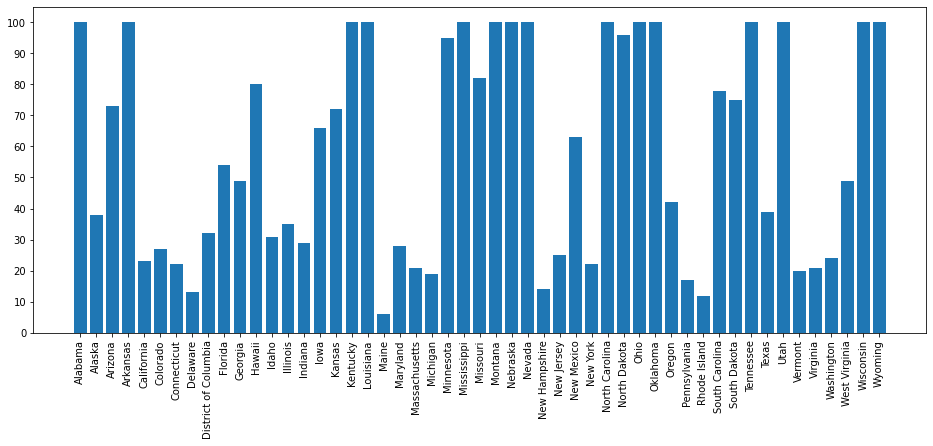

In [76]:
#Depict participation rate for ACT among states
plt.figure(figsize=(16,6))
plt.bar(clean_act_2019['State'], clean_act_2019['Participation'], width = 0.8)
plt.xticks(rotation='vertical')
plt.yticks(np.arange(0, 101, 10))
plt.show();

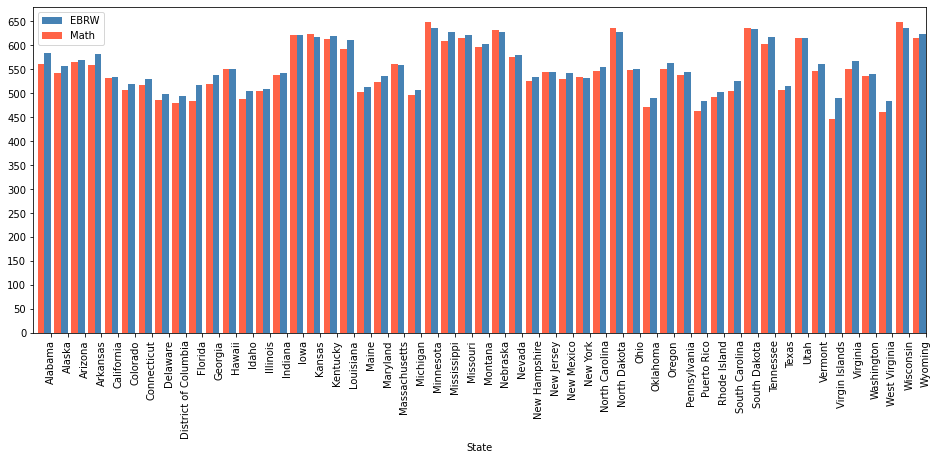

In [77]:
#SAT 2019, EBRW vs Math scores among states
width = 0.4

#Create figure
fig = plt.figure(figsize=(16,6))
#add subplot
ax = fig.add_subplot(111)
plt.yticks(np.arange(0, 800, 50))

#plot value for EBRW. specify position = 1
sat_2019.plot(kind='bar', x='State', y='EBRW', ax=ax, position=1,
              width=width, color='steelblue')

#plot value for Math, specify position =2
sat_2019.plot(kind='bar', x='State', y='Math', ax=ax, position=2,
              width=width, color='tomato');

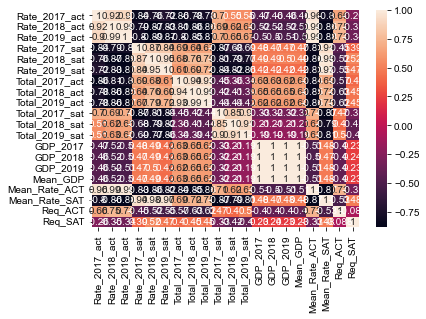

In [78]:
#Display a correation heat map
sns.heatmap(act_sat_merged.corr(),annot= True);
sns.set(rc = {'figure.figsize':(50,15)})

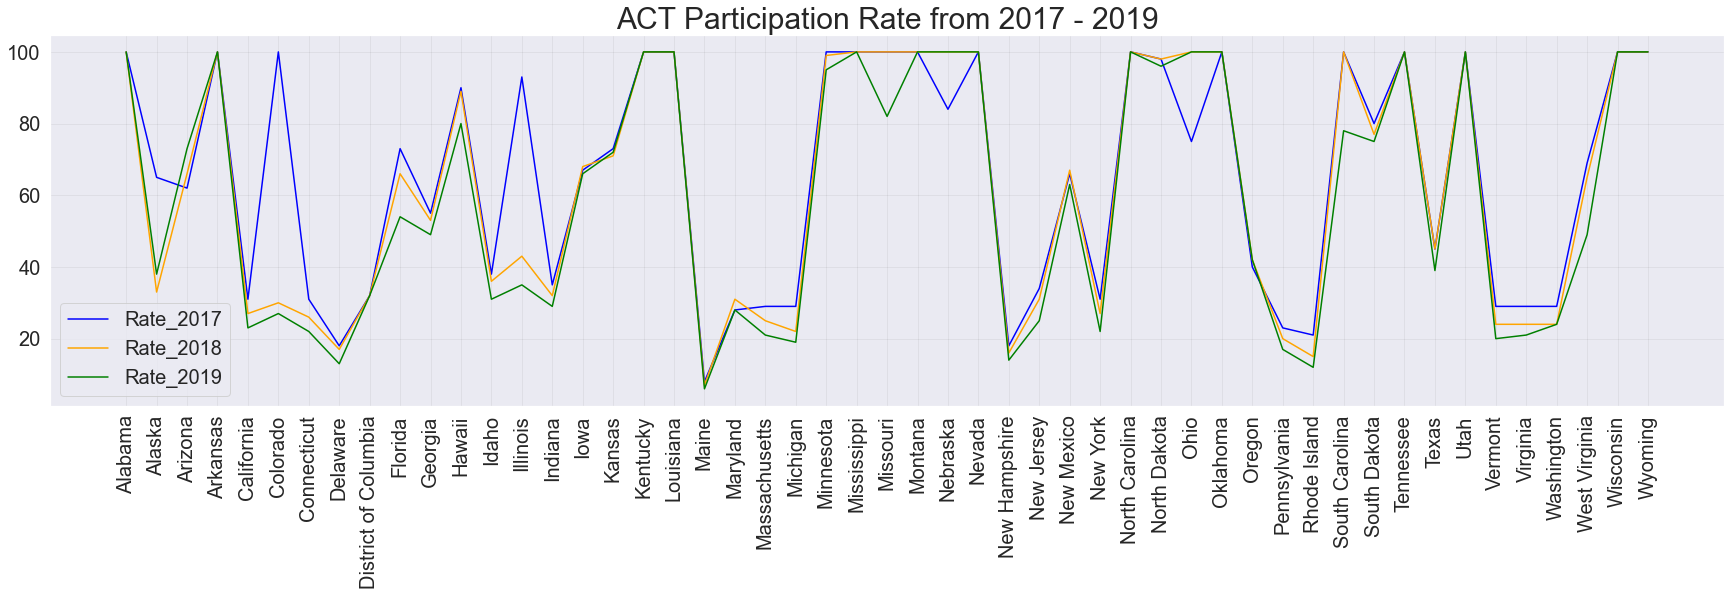

In [79]:
#Visualise trended ACT Participation Rate
plt.figure(figsize = (30,15))
act_1 = plt.subplot(2, 1, 1)
plt.plot(act_sat_merged['State'],
         act_sat_merged['Rate_2017_act'],
         c = 'blue',
         label = 'Rate_2017')
plt.plot(act_sat_merged['State'],
         act_sat_merged['Rate_2018_act'],
         c = 'orange',
         label = 'Rate_2018')
plt.plot(act_sat_merged['State'],
         act_sat_merged['Rate_2019_act'],
         c = 'green',
         label = 'Rate_2019')
plt.legend(loc = 'lower left', fontsize = 20)
plt.grid(True, linewidth = 0.5, linestyle = '-', c = 'black', alpha = 0.1)
plt.xticks(rotation='vertical',fontsize = 20)
plt.yticks(fontsize = 20)
plt.title("ACT Participation Rate from 2017 - 2019", fontsize = 30);

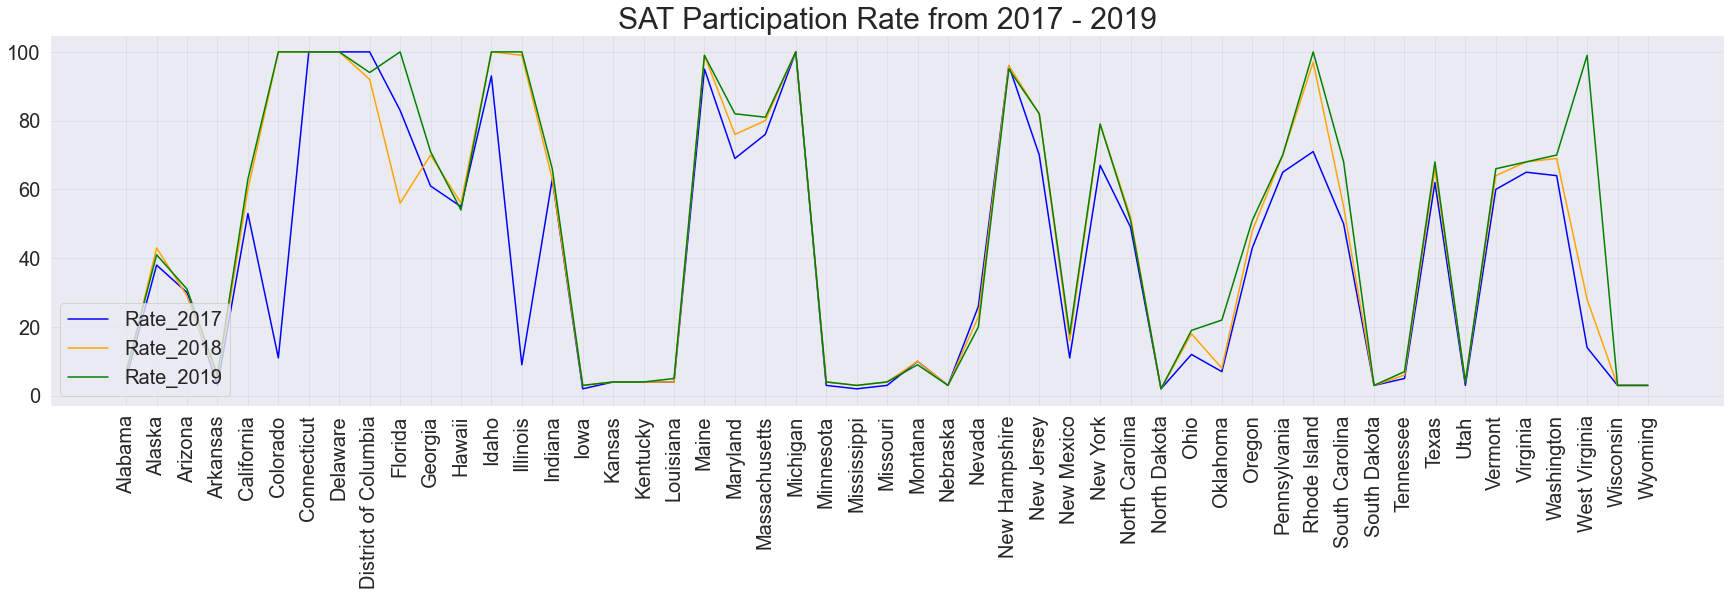

In [80]:
#Visualise trended SAT Participation Rate
plt.figure(figsize = (30,15))
act_1 = plt.subplot(2, 1, 1)
plt.plot(act_sat_merged['State'],
         act_sat_merged['Rate_2017_sat'],
         c = 'blue',
         label = 'Rate_2017')
plt.plot(act_sat_merged['State'],
         act_sat_merged['Rate_2018_sat'],
         c = 'orange',
         label = 'Rate_2018')
plt.plot(act_sat_merged['State'],
         act_sat_merged['Rate_2019_sat'],
         c = 'green',
         label = 'Rate_2019')
plt.legend(loc = 'lower left', fontsize = 20)
plt.grid(True, linewidth = 0.5, linestyle = '-', c = 'black', alpha = 0.1)
plt.xticks(rotation='vertical',fontsize = 20)
plt.yticks(fontsize = 20)
plt.title("SAT Participation Rate from 2017 - 2019", fontsize = 30);